# Python ja data-analytiikka
# Palautettava tehtävä 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the survey data
df = pd.read_excel(
    r'D:\GitHub\PythonDataAnalytics\doc\Opinnäytetyökysely.xlsx',
    engine='openpyxl'
)

# 2) Print all column names to verify
print("Columns available:\n", df.columns.to_list())


Columns available:
 ['Aikaleima', 'Kuinka löysit aiheesi?', 'Opinnäytetyöni oli hankkeistettu', 'Oliko työsi teoreettinen vai käytännöllinen? Teoreettinen (1) - Käytännöllinen (5)', 'Pystyin itse vaikuttamaan aiheen valintaan', 'Olin innostunut opinnäytetyötä tehdessäni', 'Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan', 'Sain riittävästi ohjausta', 'Hankin itse aktiivisesti tietoa työni aiheesta', 'Tutkimusaiheeni kiinnosti minua', 'Sain muilta opiskelijoilta tukea työni tekemisessä', 'Työn toimeksiantaja oli kiinnostunut työstäni', 'Työn toimeksiantaja oli kiinnostunut ohjaamaan työtäni', 'Ohjaajani panos tuki työtäni', 'Saamani ohjaus oli asiantuntevaa', 'Valmistauduin ohjauspalavereihin', 'Saamani ohjaus oli motivoivaa', 'Työni ohjaaja vastasi nopeasti tiedusteluihini', 'Ohjaustilanteet eivät tuntuneet minusta pelottavilta', 'Ohjaajaani oli helppo lähestyä', 'Luotin ohjaajani neuvoihin', 'Eri ohjaustapojen käyttäminen ja niiden hyödyllisyys: Seminaarit', 'Eri ohjaustap

## Histogram of “Sain riittävästi ohjausta”

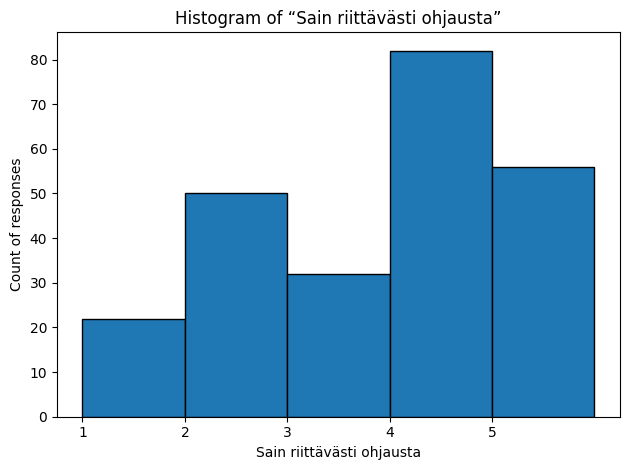

In [4]:
# 3) Histogram of supervision satisfaction
guidance_col = 'Sain riittävästi ohjausta'
guidance = df[guidance_col].dropna().astype(int)

plt.figure()
plt.hist(
    guidance,
    bins=range(guidance.min(), guidance.max() + 2),
    edgecolor='black'
)
plt.xticks(range(guidance.min(), guidance.max() + 1))
plt.xlabel(guidance_col)
plt.ylabel('Count of responses')
plt.title('Histogram of “Sain riittävästi ohjausta”')
plt.tight_layout()
plt.show()


## Hajontakaavio: Vaikutus vs. ohjaus

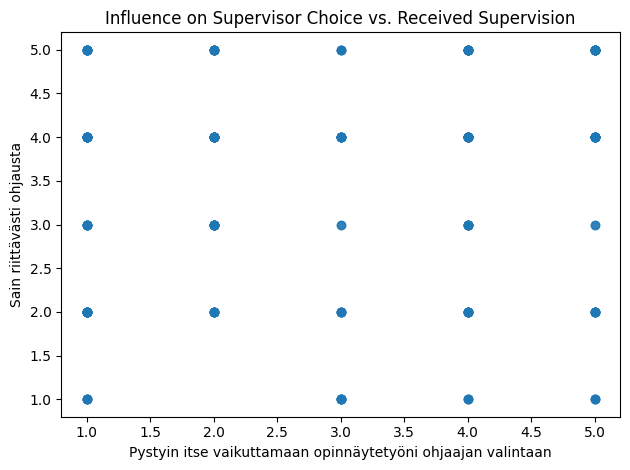

In [5]:
# 4) Scatter: influence vs. supervision satisfaction
influence_col = 'Pystyin itse vaikuttamaan opinnäytetyöni ohjaajan valintaan'
influence = df[influence_col].dropna().astype(int)
paired_guidance = df.loc[influence.index, guidance_col].astype(int)

plt.figure()
plt.scatter(influence, paired_guidance, alpha=0.7)
plt.xlabel(influence_col)
plt.ylabel(guidance_col)
plt.title('Influence on Supervisor Choice vs. Received Supervision')
plt.tight_layout()
plt.show()


### Selitys hajontakaaviolle
- Muuttujat ovat diskreettejä Likert-asteikolla (1–5), joten datapisteitä on vain muutama eri (x,y)-yhdistelmä.  
- Useat vastaajat valitsivat saman yhdistelmän, ja pisteet päällekkäin peittävät toisensa.  

## Hajontakaavio: Aika vs. arvosana

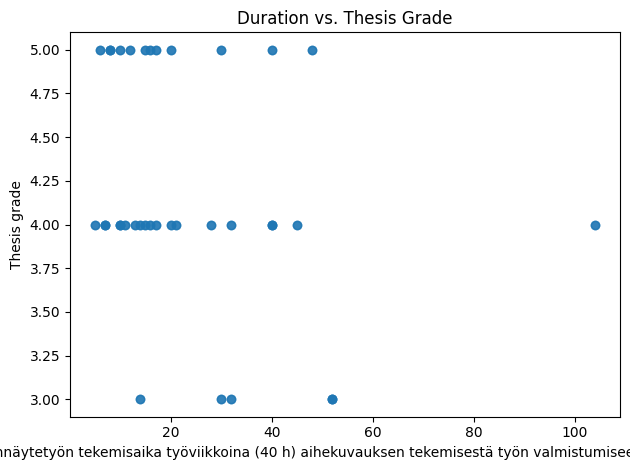

In [6]:
# 5) Scatter: duration vs. grade
time_col  = 'Opinnäytetyön tekemisaika työviikkoina (40 h) aihekuvauksen tekemisestä työn valmistumiseen:työviikkoa'
grade_col = 'Thesis grade'

df_grades = df.dropna(subset=[grade_col]).copy()
df_grades[time_col]  = df_grades[time_col].astype(float)
df_grades[grade_col] = df_grades[grade_col].astype(float)

plt.figure()
plt.scatter(df_grades[time_col], df_grades[grade_col], alpha=0.7)
plt.xlabel(time_col)
plt.ylabel(grade_col)
plt.title('Duration vs. Thesis Grade')
plt.tight_layout()
plt.show()


## Yhteenveto
- Histogrammi näyttää jakauman
- Hajontakaaviot näyttävät korrelaatiot